In [1]:
from torch_geometric.datasets import QM9
dataset = QM9(root='')
dataset.num_features, dataset.num_classes 

(11, 19)

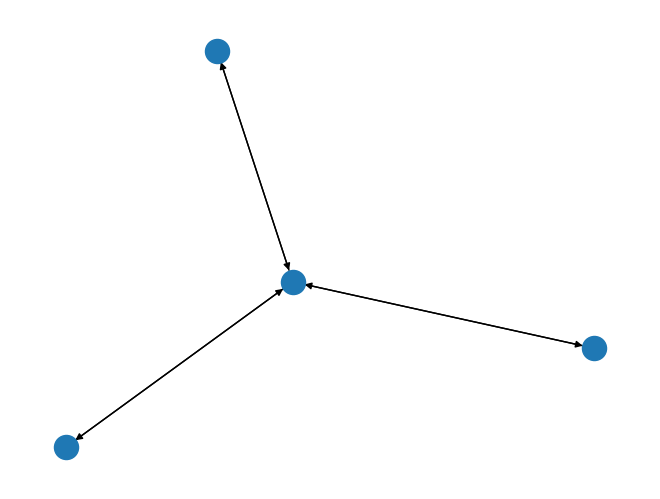

In [2]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(to_networkx(dataset[5]))
plt.show()

In [3]:
from torch_geometric.loader import DataLoader
data_load = DataLoader(dataset, batch_size=64, drop_last=True)

In [4]:
for batch in data_load:
    print(batch, len(data_load), len(dataset))
    break

DataBatch(x=[562, 11], edge_index=[2, 1020], edge_attr=[1020, 4], y=[64, 19], pos=[562, 3], z=[562], name=[64], idx=[64], batch=[562], ptr=[65]) 2044 130831


In [5]:
import torch
import torch_geometric
# from torch_scatter import scatter_mean
from torch_geometric.nn import global_mean_pool
class Network(torch.nn.Module):
    def __init__(self, hidden_dim):
        super(Network, self).__init__()
        self.gnn1 = torch_geometric.nn.GCNConv(dataset.num_features, hidden_dim)
        self.gnn2 = torch_geometric.nn.GCNConv(hidden_dim, hidden_dim//2)
        self.gnn3 = torch_geometric.nn.GCNConv(hidden_dim//2, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        x = self.gnn1(x, edge_index)
        x = torch.nn.functional.relu(x)

        x = self.gnn2(x, edge_index)
        x = torch.nn.functional.relu(x)
        
        x = self.gnn3(x, edge_index)
        x = torch.nn.functional.relu(x)
        
        x = global_mean_pool(x, batch)
        x = torch.nn.functional.dropout(x, p=0.5, training=self.training)
#         print(x.shape)
        return x

In [6]:
hidden_dim = 20
model = Network(hidden_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.HuberLoss()
for batch in data_load:
#         print('num_graphs:',batch.num_graphs)
        score = model(torch.tensor(batch.x, dtype=torch.float) , batch.edge_index, batch.batch)
#         print(score.shape, batch.y.view(-1).shape)
        print(score.shape, batch.y.shape)
        print(score, batch.y)
        loss = criterion(score, batch.y)
        print(loss)
        break

torch.Size([64, 19]) torch.Size([64, 19])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2620, 0.0000],
        [0.0000, 0.3554, 0.0000,  ..., 0.0000, 0.1764, 0.0000],
        [0.0000, 0.0000, 0.4188,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.6966, 0.4860, 0.0000,  ..., 0.0000, 0.2344, 0.0429],
        [0.7284, 0.0000, 0.3403,  ..., 0.0000, 0.0000, 0.0000],
        [0.7377, 0.5519, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>) tensor([[  0.0000,  13.2100, -10.5499,  ..., 157.7118, 157.7100, 157.7070],
        [  1.6256,   9.4600,  -6.9933,  ..., 293.6097, 293.5411, 191.3940],
        [  1.8511,   6.3100,  -7.9675,  ..., 799.5881, 437.9039, 282.9455],
        ...,
        [  3.9512,  46.2300,  -8.6532,  ...,   7.9001,   3.9547,   2.8864],
        [  2.7429,  42.8700,  -7.3580,  ...,   8.3010,   3.9762,   2.9376],
        [  1.3582,  44.0300,  -7.2518,  ...,   8.5592,   3.8995,   2.9187]])
tensor(1063.2131, grad_fn=<HuberLossBackward0>)


C:\Users\harsh\AppData\Local\Temp\ipykernel_25996\1476021716.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  score = model(torch.tensor(batch.x, dtype=torch.float) , batch.edge_index, batch.batch)


In [7]:
hidden_dim = 24
model = Network(hidden_dim)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = torch.nn.HuberLoss()
num_epochs = 40
for epoch in range(1, num_epochs+1):
    epoch_loss = 0
    for batch in data_load:
#         print('num_graphs:',batch.num_graphs)
        score = model(torch.tensor(batch.x, dtype=torch.float) , batch.edge_index, batch.batch)
#         print(score.shape, batch.y.view(-1).shape)
        loss = criterion(score, batch.y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_loss+=loss
    print(f'Loss at epoch {epoch} is: {epoch_loss}')

C:\Users\harsh\AppData\Local\Temp\ipykernel_25996\3725276809.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  score = model(torch.tensor(batch.x, dtype=torch.float) , batch.edge_index, batch.batch)


Loss at epoch 1 is: 4973834.0
Loss at epoch 2 is: 4927118.5
Loss at epoch 3 is: 4926787.5
Loss at epoch 4 is: 4926751.5
Loss at epoch 5 is: 4926769.5
Loss at epoch 6 is: 4926588.5
Loss at epoch 7 is: 4926288.0
Loss at epoch 8 is: 4926329.5
Loss at epoch 9 is: 4926186.0
Loss at epoch 10 is: 4926129.5
Loss at epoch 11 is: 4925970.0
Loss at epoch 12 is: 4925848.0
Loss at epoch 13 is: 4926018.5
Loss at epoch 14 is: 4925582.5
Loss at epoch 15 is: 4925709.0
Loss at epoch 16 is: 4925760.0
Loss at epoch 17 is: 4925510.5
Loss at epoch 18 is: 4925335.0
Loss at epoch 19 is: 4925481.0
Loss at epoch 20 is: 4925388.5
Loss at epoch 21 is: 4925193.5
Loss at epoch 22 is: 4925562.5
Loss at epoch 23 is: 4925312.5
Loss at epoch 24 is: 4925284.0
Loss at epoch 25 is: 4925003.0
Loss at epoch 26 is: 4925185.0
Loss at epoch 27 is: 4925001.0
Loss at epoch 28 is: 4925138.0
Loss at epoch 29 is: 4925270.5
Loss at epoch 30 is: 4925008.5
Loss at epoch 31 is: 4925089.0
Loss at epoch 32 is: 4924958.5
Loss at epoch 33 

In [8]:
model.eval()
print(dataset[4].x.shape)
for i in DataLoader(torch.utils.data.Subset(dataset, [4])):
    print(criterion(model(torch.tensor(i.x, dtype=torch.float), i.edge_index, i.batch), i.y))

torch.Size([3, 11])
tensor(572.2457, grad_fn=<HuberLossBackward0>)


C:\Users\harsh\AppData\Local\Temp\ipykernel_25996\2205664367.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(criterion(model(torch.tensor(i.x, dtype=torch.float), i.edge_index, i.batch), i.y))
